# Матричные графики
Являются визуальным аналогом отображения сводной таблицы. Такой график показывает все данные, визуализируя все числовые значения в датафрейме

**Важно: не каждый датафрейм хорошо подходит для матричных графиков!**

Два основных типа матричных графиков в seaborn:
* heatmap() - тепловая карта - изображает распределение значений по ячейкам с помощью цветов
* clustermap() - карта кластеров - похожа на heatmap, но сначал выполняет иерархическую кластеризацию, объединяя данные в группы

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные
Мы будем использовать набор данных, который называется "World Population Prospects". В этом отчёте организация United Nations опубликовала оценочные данные о населении всех стран за все года с 1950 до 2020, а также прогнозы для различных сценариев с 2020 до 2100. Мы будем строить наши графики для среднего варианта развития событий.

https://www.ined.fr/en/everything_about_population/data/all-countries/?lst_continent=900&lst_pays=926

Источник: Оценки для текущего года на основе отчёта World Population Prospects. United Nations.

In [6]:
# Прогнозы 2020
df = pd.read_csv('country_table.csv')
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


## График .heatmap()
Такой график выглядит лучше всего, если все переменные измеряются в одних и тех же единицах - тогда цвета имеют один и тот же смысл для всех переменных. В нашем примере показатели '... rate' измеряются в процентах прироста.

In [11]:
df = df.set_index('Countries')
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


<Axes: ylabel='Countries'>

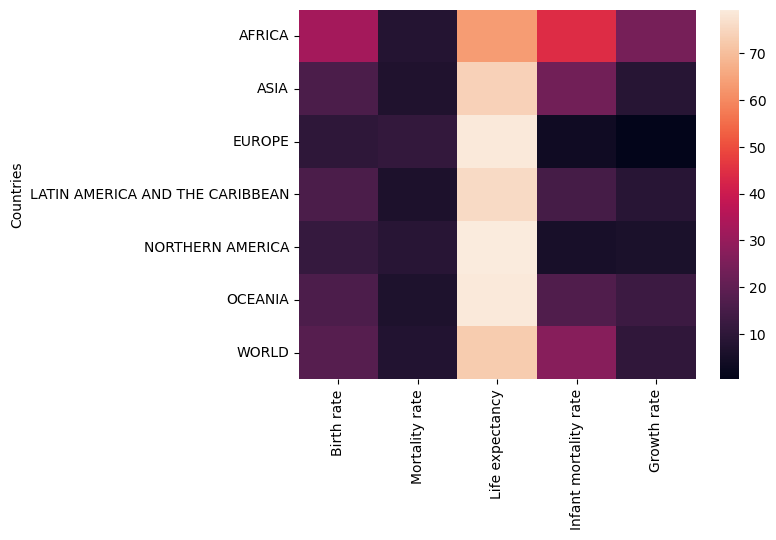

In [13]:
# Показывает ожидаемый средний возраст (life expectancy) различными цветами
sns.heatmap(data=df)

In [15]:
rates = df.drop('Life expectancy', axis=1)
rates

,Birth rate,Mortality rate,Infant mortality rate,Growth rate
Countries,,,,
AFRICA,32.577,7.837,44.215,24.40
ASIA,15.796,7.030,23.185,8.44
EUROPE,10.118,11.163,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,14.570,8.89
NORTHERN AMERICA,11.780,8.833,5.563,6.11
OCEANIA,16.235,6.788,16.939,12.79
WORLD,17.963,7.601,27.492,10.36


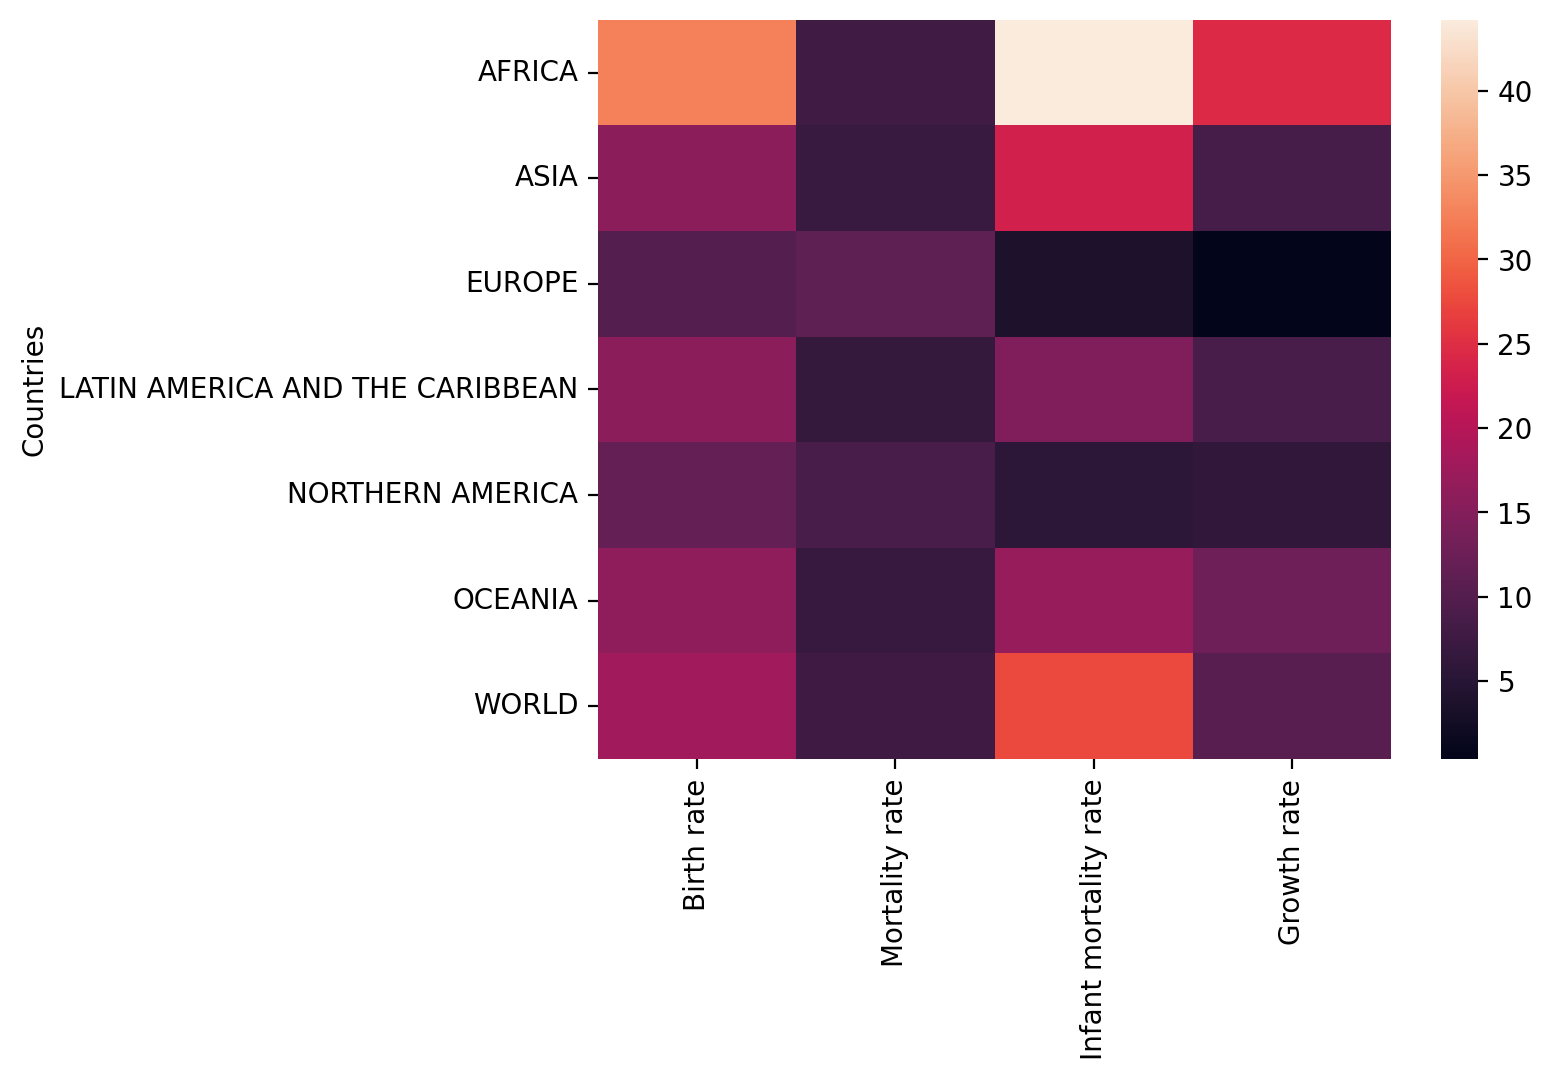

In [23]:
plt.figure(dpi=200)
sns.heatmap(data=rates)
plt.show()

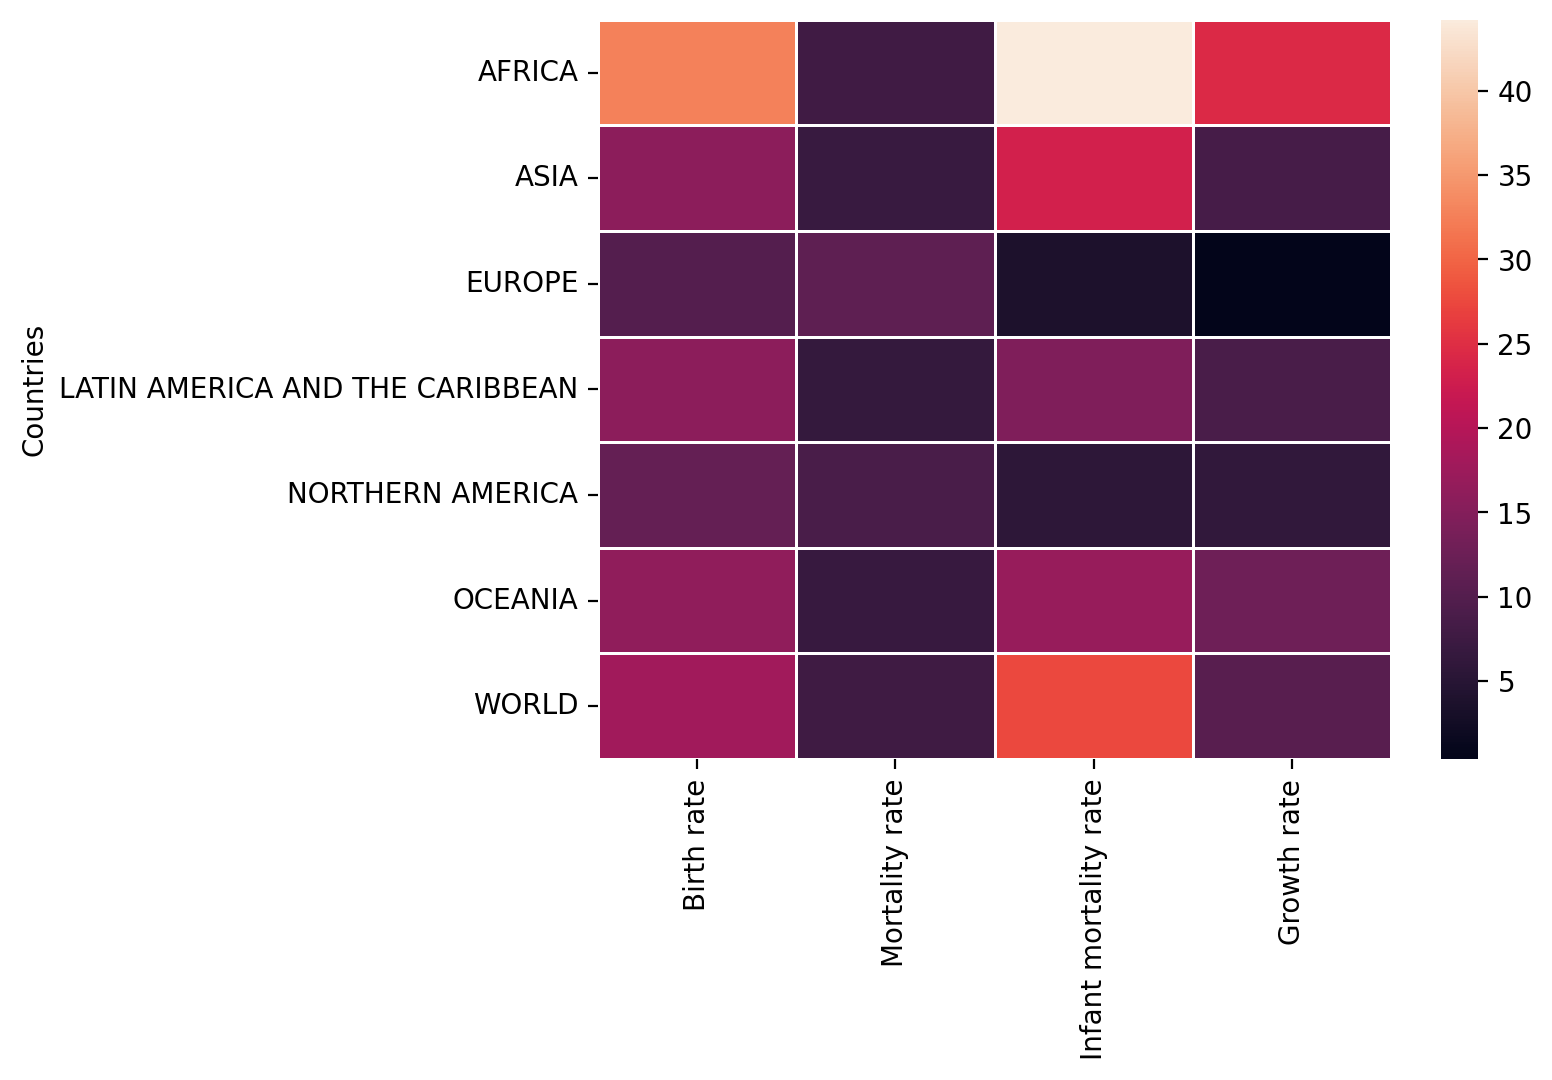

In [25]:
plt.figure(dpi=200)
sns.heatmap(data=rates, linewidths=0.5)
plt.show()

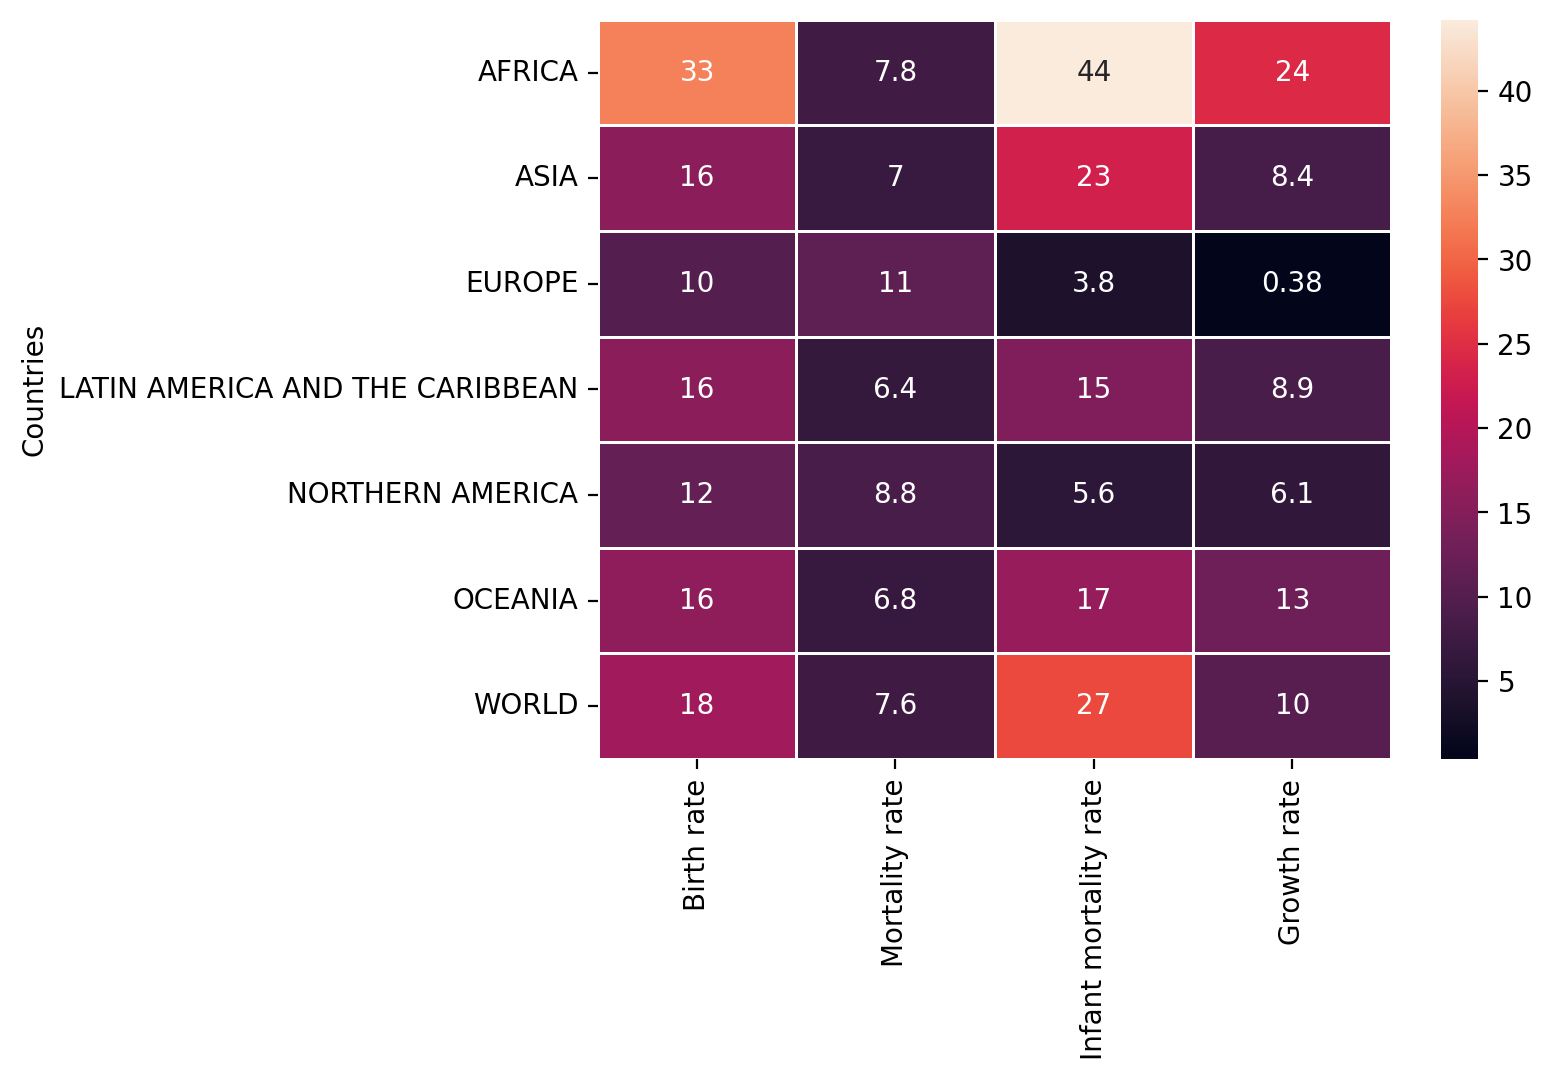

In [27]:
plt.figure(dpi=200)
sns.heatmap(data=rates, linewidths=0.5, annot=True)
plt.show()

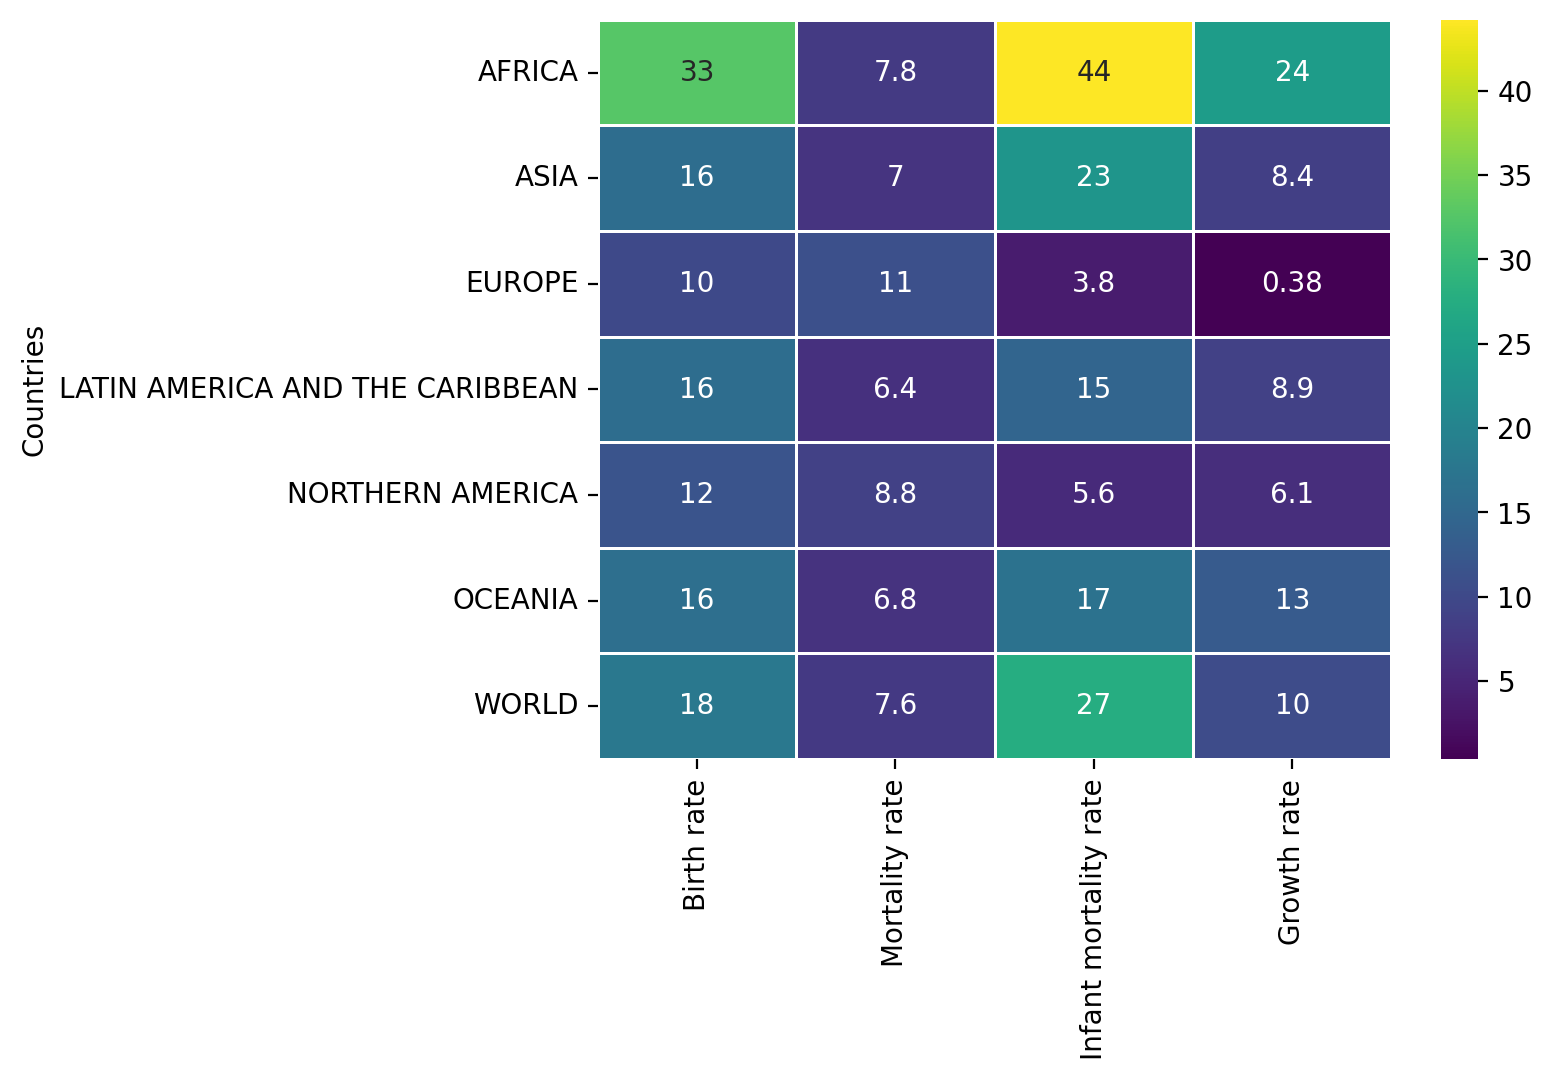

In [29]:
plt.figure(dpi=200)
sns.heatmap(data=rates, linewidths=0.5, annot=True, cmap='viridis')
plt.show()

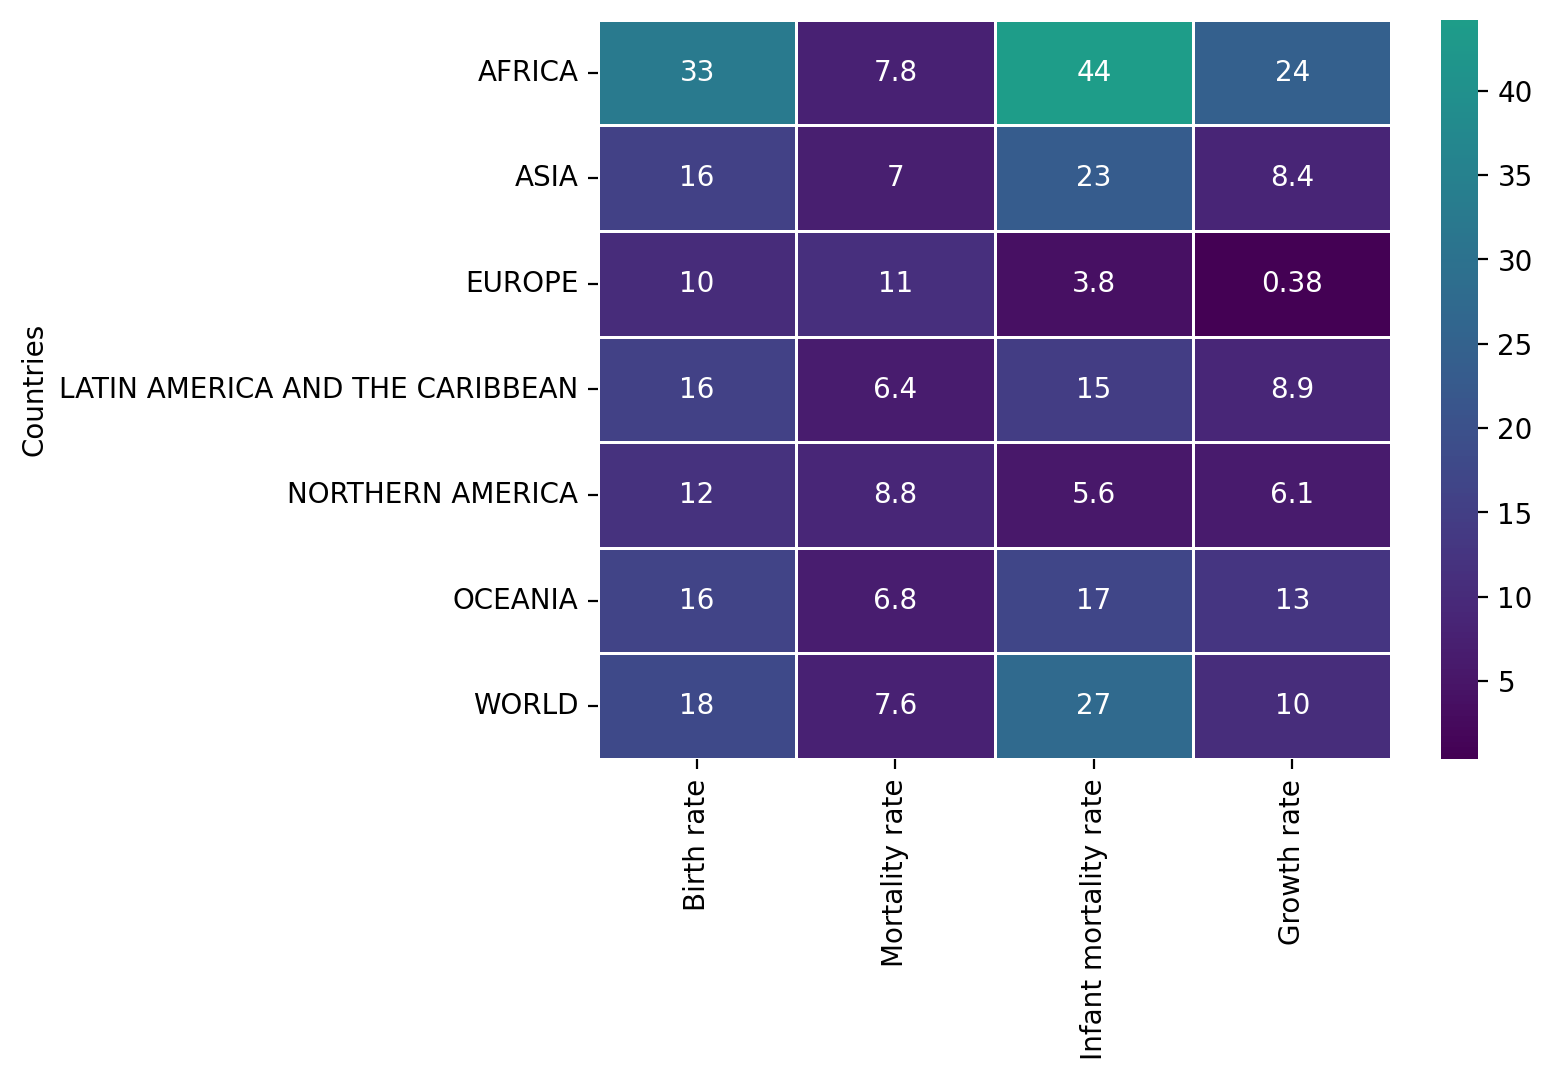

In [33]:
# Цвета можно уточнить с помощью значения из набора данных - это параметр center
plt.figure(dpi=200)
sns.heatmap(data=rates, linewidths=0.5, annot=True, cmap='viridis', center=40)
plt.show()

## График .clustermap()
Seaborn - выполняет операцию кластерихации для группировки похожих данных.

<Figure size 1280x960 with 0 Axes>

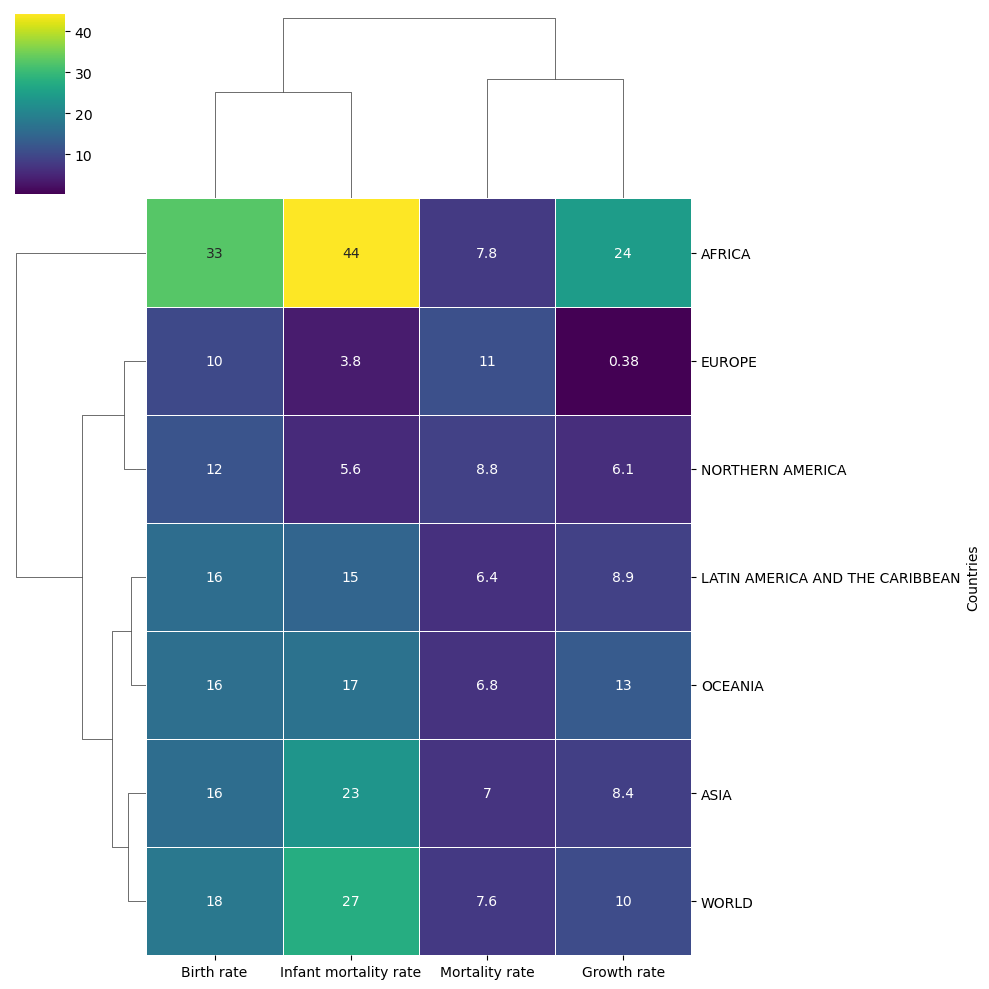

In [37]:
plt.figure(dpi=200)
sns.clustermap(data=rates, linewidths=0.5, annot=True, cmap='viridis')
plt.show()

<Figure size 1280x960 with 0 Axes>

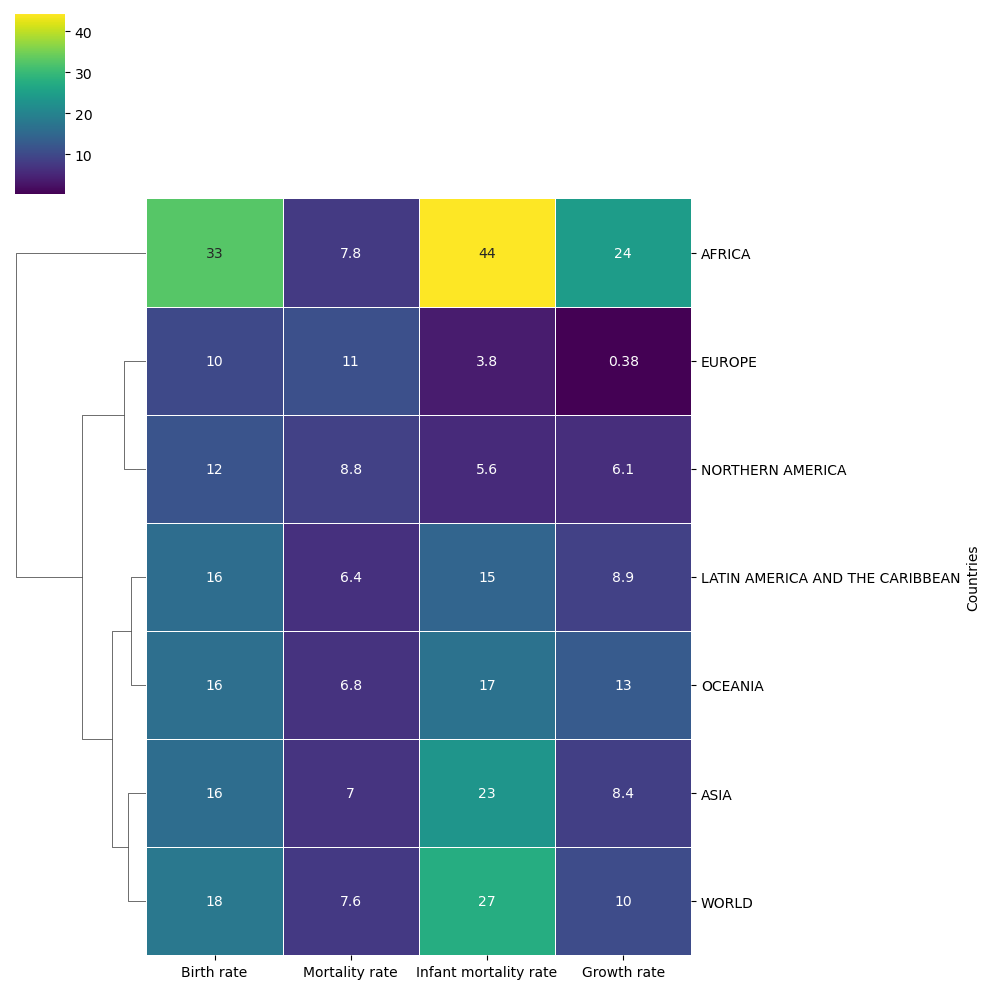

In [39]:
# Группировка только строк
plt.figure(dpi=200)
sns.clustermap(data=rates, linewidths=0.5, annot=True, cmap='viridis', col_cluster=False)
plt.show()

<Figure size 1280x960 with 0 Axes>

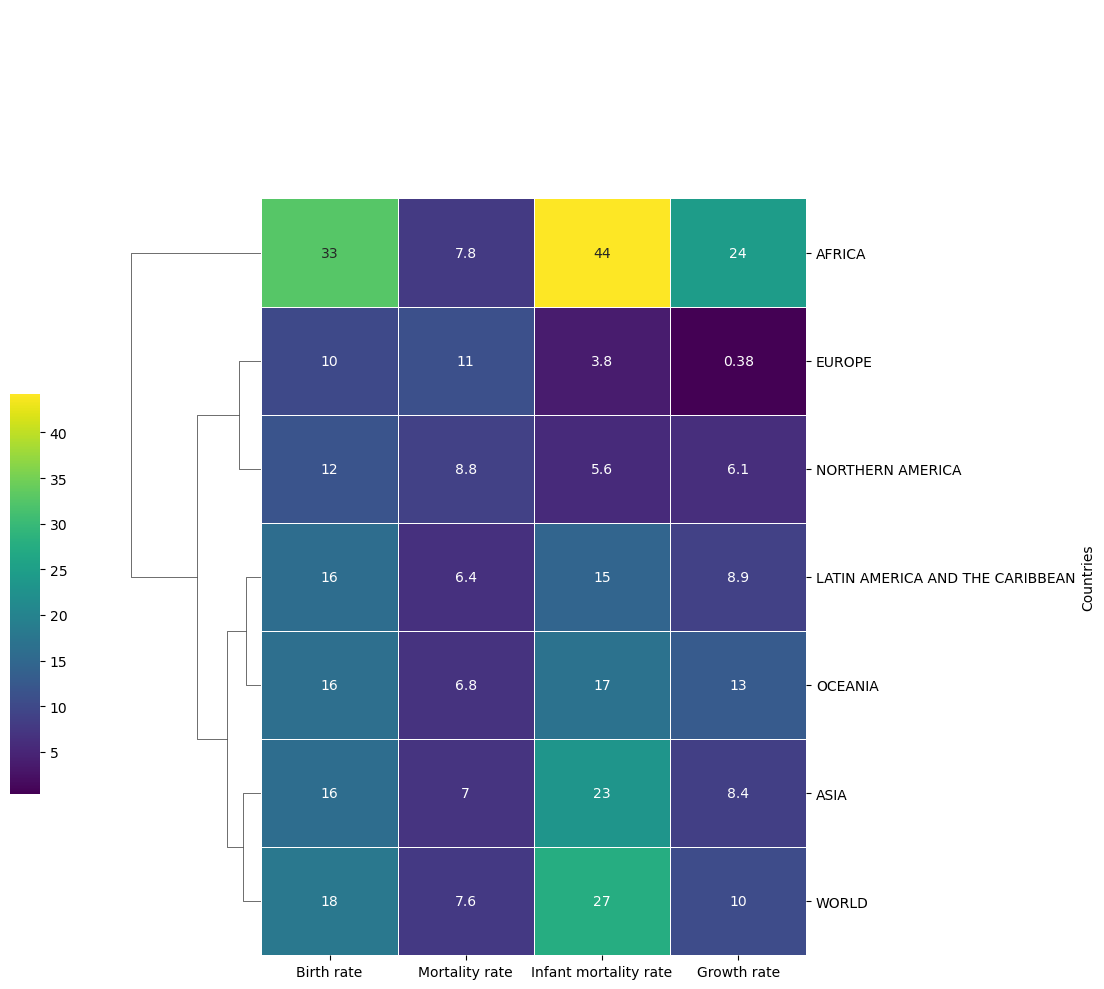

In [41]:
plt.figure(dpi=200)
sns.clustermap(data=rates, linewidths=0.5, annot=True, cmap='viridis', col_cluster=False, cbar_pos=(-0.1, .2, .03, .4))
plt.show()

In [43]:
rates.index.set_names('',inplace=True)
rates

,Birth rate,Mortality rate,Infant mortality rate,Growth rate
,,,,
AFRICA,32.577,7.837,44.215,24.40
ASIA,15.796,7.030,23.185,8.44
EUROPE,10.118,11.163,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,14.570,8.89
NORTHERN AMERICA,11.780,8.833,5.563,6.11
OCEANIA,16.235,6.788,16.939,12.79
WORLD,17.963,7.601,27.492,10.36


<Figure size 1280x960 with 0 Axes>

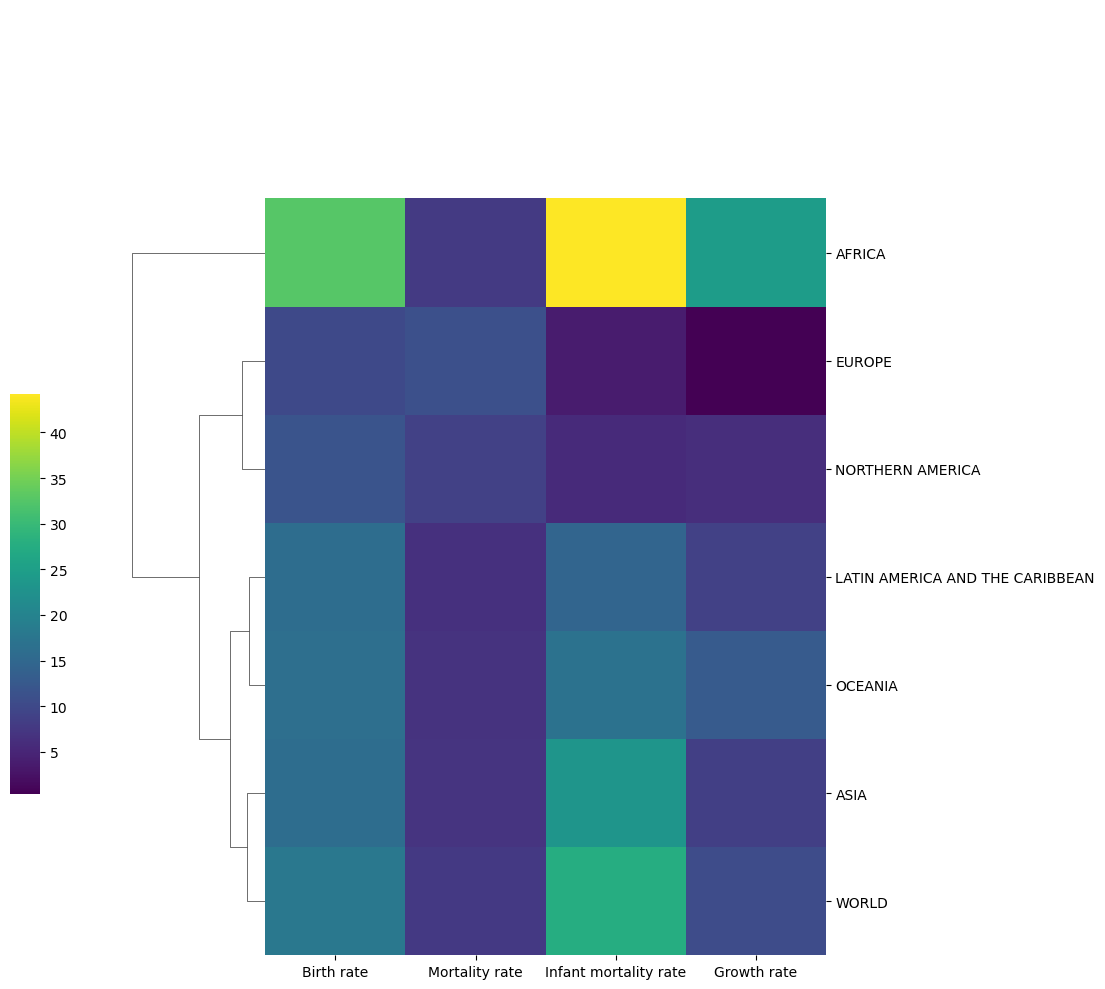

In [45]:
# всегда можно отредактировать набор данных DataFrame перед построением графика
plt.figure(dpi=200)
sns.clustermap(data=rates, cmap='viridis', col_cluster=False, cbar_pos=(-0.1, .2, .03, .4))
plt.show()

---